### Model Selection of Regression

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load the dataset

In [2]:
df = pd.read_csv('Data.csv')

***Let check the shape of the datasets***

In [3]:
df.shape

(9568, 5)

**We have 9,568 rows and 5 columns in in the datasets**


#### Let check the first 5 rows and columns of the data sets

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


###### Let check the data type

In [5]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

#### Let check how the data set are been display

In [6]:
df.info

<bound method DataFrame.info of          AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]>

#### We can also check the columns and index of the data set

In [7]:
df.columns. values

array(['AT', 'V', 'AP', 'RH', 'PE'], dtype=object)

In [8]:
df.index.values

array([   0,    1,    2, ..., 9565, 9566, 9567], dtype=int64)

#### Descriptive Statistic

In [9]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


#### Let check the correlations betwen the variables

In [11]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


#### Data Cleaning

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

AT
False    9568
Name: AT, dtype: int64

V
False    9568
Name: V, dtype: int64

AP
False    9568
Name: AP, dtype: int64

RH
False    9568
Name: RH, dtype: int64

PE
False    9568
Name: PE, dtype: int64



### Continuous numerical variables


**Let's see several examples of different linear relationship**


###### Positive linear relationship



**Let's find the scatter plot of 'A_Temperature' and 'PE'**

In [14]:
import seaborn as sns
%matplotlib inline

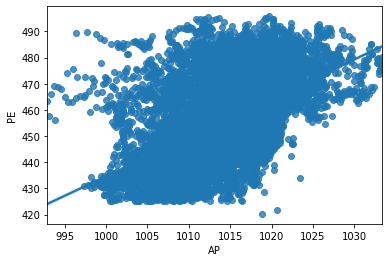

In [15]:
sns.regplot(x= 'AP', y = 'PE', data = df)
# plt.ylim(0,)

In [16]:
df[['AP', 'PE']].corr()

,AP,PE
AP,1.000000,0.518429
PE,0.518429,1.000000


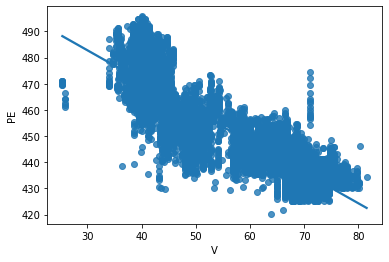

In [17]:
sns.regplot(x ='V', y = 'PE', data = df)

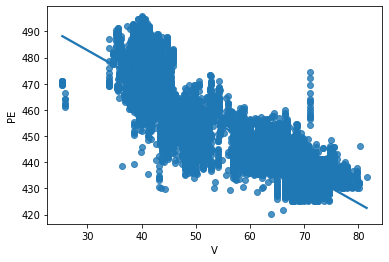

In [18]:
sns.regplot(x = 'V', y = 'PE', data = df)

**As we can see, we have a clean datasets**



### Simple Linear Regression




**Let extract the Features and target into different data frame**

In [19]:
Features = ['AT']

In [20]:
target = ['PE']

In [21]:
X = df[Features]

In [22]:
X

,AT
0,14.96
1,25.18
2,5.11
3,20.86
4,10.82
...,...
9563,16.65
9564,13.19
9565,31.32
9566,24.48


In [23]:
y = df[target]

In [24]:
y

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90
...,...
9563,460.03
9564,469.62
9565,429.57
9566,435.74


#### Let Split the datasets into Training set  and Test set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Train the simple Linear Regression on the train set

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Predicting the test results

In [29]:
y_pred = regressor.predict(x_test)
y_pred

array([[434.76410847],
       [459.05380424],
       [464.74602275],
       ...,
       [470.43824126],
       [437.7622999 ],
       [459.48832474]])

##### What is the values of the intercept (a) and coef (b)

In [30]:
regressor.intercept_

array([497.03089567])

In [31]:
regressor.coef_

array([[-2.17260248]])

##### regression plot

 
**Let's visualize AT as potential predictor variable of PE**

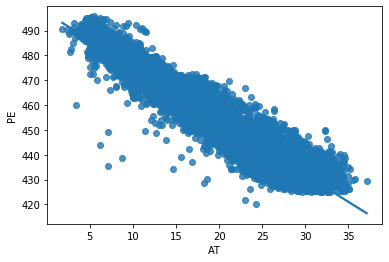

In [32]:
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x = 'AT', y = 'PE', data = df)

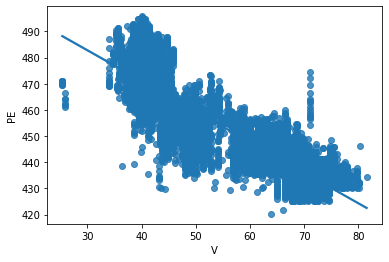

In [33]:
plt.figure(figsize=(width, height))
sns.regplot(x = 'V', y= 'PE', data = df)

### Calculate the R^2

In [34]:
regressor.score(X_train, y_train)

0.8974271121640927

In [35]:
r2_score(y_test, y_pred)

0.9049536175690113

##### Let calculate mean sqaure error by importing metrics

In [36]:
y_prediction = regressor.predict(x_test)
y_prediction

array([[434.76410847],
       [459.05380424],
       [464.74602275],
       ...,
       [470.43824126],
       [437.7622999 ],
       [459.48832474]])

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
RMSE =sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

5.272562059337883


## Multiple Linear Regression

**Yhatb = a+biX1 + b2X2 + b3X3 + b4X4**


**Y = response  Variable**

**X1 = predictor variable 1**

**X2 = predictor variable 2**

**X3 = predictor variable 3**

**X4 = predictor variable 4**

**a = intercept**

###### b1 = coef of variable 1
###### b2 = coef of variable 2
###### b3 = coef of variable 3
###### b4 = coef of variable 4


###### 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

In [39]:
X = df.iloc[:, :-1]. values
y = df.iloc[:, -1].values

In [40]:
# print(X)

In [41]:
# print(y.reshape(len(y), 1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Train the Multiple linear regession on a Train set 

In [43]:
lm = LinearRegression()
# lm.fit(X, df.iloc[:, -1])
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lm.intercept_

452.8410371616384

In [45]:
lm.coef_

array([-1.97313099, -0.23649993,  0.06387891, -0.15807019])

In [46]:
Y_hat = lm.predict(X)

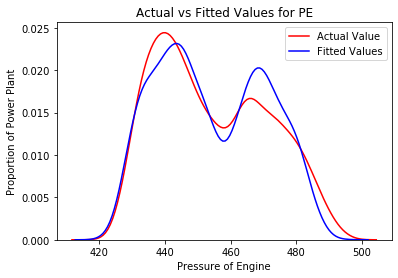

In [47]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df.iloc[:, -1], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Y_hat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)

plt.title('Actual vs Fitted Values for PE')
plt.xlabel('Pressure of Engine')
plt.ylabel('Proportion of Power Plant')

plt.show()
plt.close()

##### Training the Multiple Linear Regression model on the Training set

In [51]:
# y_pred = lm.predict(x_test)
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [52]:
r2_score(y_test, y_pred)

0.9049536175690113

In [53]:
lm.score(X_train, y_train)

0.9277253998587902